In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm

#### Data Collection and Data Pre-processing

In [153]:
#loading the dataset
loan_dataset = pd.read_csv('./data/data.csv',index_col='Loan_ID')

In [154]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [155]:
loan_dataset.shape

(614, 12)

In [156]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [157]:
# number of missing values in each column
loan_dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [158]:
# filling the missng values for credit history
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(1)

In [159]:
loan_dataset = loan_dataset.dropna()

In [160]:
loan_dataset.shape

(480, 12)

In [161]:
loan_dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [162]:
# label encoding
loan_dataset = loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}})

In [163]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [164]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [165]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [166]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

#### Data Visualisation

<Axes: xlabel='Education', ylabel='count'>

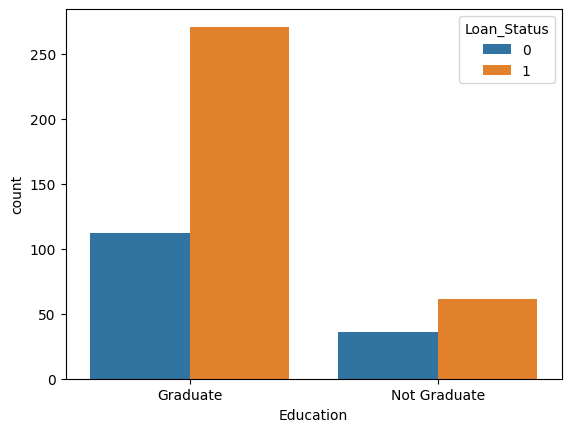

In [167]:
# education and loan status
sns.countplot(x='Education',hue="Loan_Status",data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

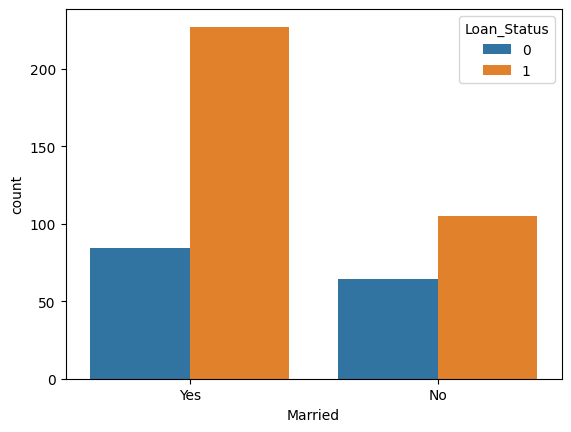

In [168]:
# marital and Loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [169]:
# convert categorical columns to numerical values
loan_dataset = loan_dataset.replace({
    'Married':{'Yes':1,"No":0},
    'Gender':{'Male':1,'Female':0},
    'Self_Employed':{'Yes':1,'No':0},
    'Education':{'Graduate':1,'Not Graduate':0}
})

In [170]:
# one hot encoding for Property_Area
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [171]:
matrix = encoder.fit_transform(loan_dataset[['Property_Area']]).toarray()

In [172]:
column_names = ['Rural','Semiurban','Urban']
for i in range(len(matrix.T)):
    loan_dataset[column_names[i]] = matrix.T[i]

In [173]:
loan_dataset = loan_dataset.drop(columns=['Property_Area'],axis=1)

In [174]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
Loan_ID,,,,,,,,,,,,,,
LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1.0,0.0,0.0
LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0.0,0.0,1.0
LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0.0,0.0,1.0
LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0.0,0.0,1.0
LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0.0,0.0,1.0


<Axes: >

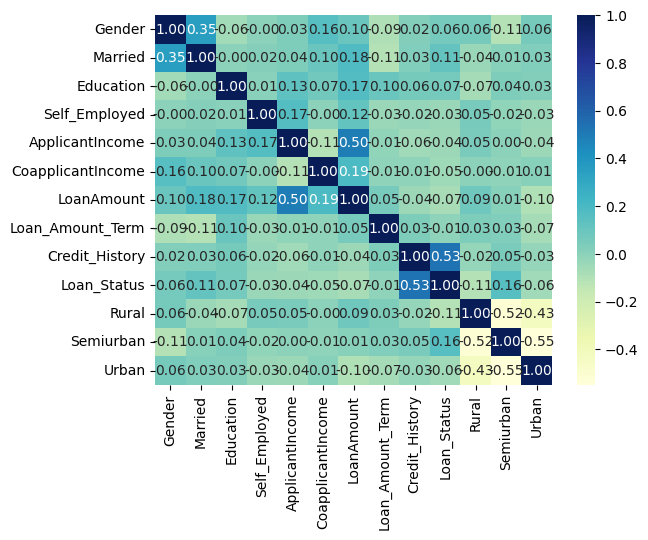

In [175]:
# Plotting the heatmap for dataFrame

sns.heatmap(loan_dataset.corr(numeric_only=True),cmap='YlGnBu',annot=True,fmt=".2f")

In [176]:
# seprating data and label
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
# X = X.reset_index(drop=True)
y = loan_dataset['Loan_Status']

In [177]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Urban
Loan_ID,,,,,,,,,,,,,
LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1.0,0.0,0.0
LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0.0,0.0,1.0
LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0.0,0.0,1.0
LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0.0,0.0,1.0
LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1.0,0.0,0.0
LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,1.0,0.0,0.0
LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0.0,0.0,1.0


In [178]:
y

Loan_ID
LP001003    0
LP001005    1
LP001006    1
LP001008    1
LP001011    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 480, dtype: int64

#### Splitting the data into Train and Test data

In [179]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=2)

In [180]:
print(X.shape,X_train.shape,X_test.shape)

(480, 13) (384, 13) (96, 13)


#### Training the Model

In [181]:
classifier = svm.SVC(kernel='linear')
model = classifier.fit(X_train,y_train)

In [182]:
# checking for overfitting on model
model.score(X_train,y_train)

0.7734375

In [183]:
# testing the model against the test data
model.score(X_test,y_test)

0.7708333333333334

In [184]:
# writing the model in a file
# import pickle
# with open('./model/model.pkl','wb') as f:
#     pickle.dump(model,f)

In [185]:
# reading the model from file
# with open('./model/model.pkl','rb') as f:
#     model2 = pickle.load(f)